In [ ]:
# import Library
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, Flatten, LSTM, Dropout, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Reshape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
# Reading data
df1= pd.read_excel("subject101.xlsx")
df2= pd.read_excel("subject102.xlsx")
df3= pd.read_excel("subject103.xlsx")
df4= pd.read_excel("subject104.xlsx")
df5= pd.read_excel("subject105.xlsx")
df6= pd.read_excel("subject106.xlsx")
df7= pd.read_excel("subject107.xlsx")
df8= pd.read_excel("subject108.xlsx")

In [ ]:
# Concatenating data, df6 is used as test data
frames = [df1, df2, df3, df4, df5, df7, df8]
result = pd.concat(frames)

In [ ]:
#shape (2502239, 9)
result.shape

(2502239, 9)

In [ ]:
#unique_activity_id
result.Activity_id.unique()

array([ 0,  1,  2,  3, 17, 16, 12, 13,  4,  7,  6,  5, 24])

In [ ]:
'''1 lying = 1
2 sitting = 2
3 standing = 2
4 walking = 3
5 running = 4
6 cycling = 5
7 Nordic walking = 0
9 watching TV = 0
10 computer work = 0
11 car driving = 0
12 ascending stairs = 6
13 descending stairs = 7
16 vacuum cleaning = 8
17 ironing = 0
18 folding laundry = 0
19 house cleaning = 8
20 playing soccer = 0
24 rope jumping = 0
0 other (transient activities) = 0

Summary/Interpretation:
1: Lying
2: Static
3: walking
4: running
5: Cycling
6/7: Stairs
8: Other
0: Removed'''

'1 lying = 1\n2 sitting = 2\n3 standing = 2\n4 walking = 3\n5 running = 4\n6 cycling = 5\n7 Nordic walking = 0\n9 watching TV = 0\n10 computer work = 0\n11 car driving = 0\n12 ascending stairs = 6\n13 descending stairs = 7\n16 vacuum cleaning = 8\n17 ironing = 0\n18 folding laundry = 0\n19 house cleaning = 8\n20 playing soccer = 0\n24 rope jumping = 0\n0 other (transient activities) = 0\n \nSummary/Interpretation:\n1: Lying\n2: Static\n3: walking\n4: running\n5: Cycling\n6/7: Stairs\n8: Other\n0: Removed'

In [ ]:
#droping null value, 0 activity_id, temperature col
result = result[result['Activity_id'] != 0]
result = result.dropna()
result.drop('Temp', axis=1, inplace=True)

<ipython-input-6-bfcd98480650>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.drop('Temp', axis=1, inplace=True)


In [ ]:
result.Activity_id.unique()


array([ 1,  2,  3, 17, 16, 12, 13,  4,  7,  6,  5, 24])

In [ ]:
# Mapping the activity id according to need
activity_id_mapping = {7:0, 17:0, 24:0, 1:1, 2:2, 3:2, 4:3, 5:4, 6:5, 12:6, 13:7, 16:8}
result['Activity_id'] = result['Activity_id'].map(activity_id_mapping)


In [ ]:
result.Activity_id.unique()

array([1, 2, 0, 8, 6, 7, 3, 5, 4])

In [ ]:
# prompt: create new column "Activity name" and give value according to following:
# 1: Lying
# 2: Static
# 3: walking
# 4: running
# 5: Cycling
# 6/7: Stairs
# 8: Other
# 0: Removed

# Create a new column 'Activity name' based on 'Activity_id'
'''def activity_name(activity_id):
  if activity_id == 1:
    return 'Lying'
  elif activity_id == 2:
    return 'Static'
  elif activity_id == 3:
    return 'Walking'
  elif activity_id == 4:
    return 'Running'
  elif activity_id == 5:
    return 'Cycling'
  elif activity_id == 6 or activity_id == 7:
    return 'Stairs'
  elif activity_id == 8:
    return 'Other'
  else:
    return 'Removed'

result['Activity name'] = result['Activity_id'].apply(activity_name)'''

In [ ]:
#dropping activity with if 0
result = result[result['Activity_id'] != 0]


In [ ]:
result

,Time,Activity_id,acc-x,acc-y,acc-z,gyro-x,gyro-y,gyro-z
2928,37.66,1,9.73855,-1.847610,0.095156,0.002908,-0.027714,0.001752
2929,37.67,1,9.69762,-1.884380,-0.020804,0.020882,0.000945,0.006007
2930,37.68,1,9.69633,-1.922030,-0.059173,-0.035392,-0.052422,-0.004882
2931,37.69,1,9.66370,-1.847140,0.094385,-0.032514,-0.018844,0.026950
2932,37.70,1,9.77578,-1.885820,0.095775,0.001351,-0.048878,-0.006328
...,...,...,...,...,...,...,...,...
362418,3630.07,4,9.25856,-0.141213,-3.933670,0.051588,0.002257,0.003737
362419,3630.08,4,9.14789,-0.255050,-3.856920,0.081061,-0.009984,0.020242
362420,3630.09,4,9.18622,-0.293577,-3.817700,0.044398,-0.009639,0.006757
362421,3630.10,4,9.37104,-0.103956,-3.932750,0.068296,-0.007361,-0.003399


In [ ]:
# prompt: show me rows for 36800 to 37050

#print(result[33865:37050])

         Time  Activity_id     acc-x     acc-y     acc-z    gyro-x    gyro-y  \
36800  376.38            2 -1.235150  0.770716  -9.95115  0.006346  0.027280   
36801  376.39            2 -1.235540  0.694779  -9.95068  0.003753  0.050399   
36802  376.40            2 -1.350530  0.810360 -10.06830  0.057393 -0.004253   
36803  376.41            2 -1.391450  0.773592 -10.18430  0.045973  0.014477   
36804  376.42            2 -1.273980  0.923470 -10.02970  0.043733 -0.004640   
...       ...          ...       ...       ...       ...       ...       ...   
39980  408.18            2 -0.417431 -0.107456  -9.97590  0.219140  0.065451   
39981  408.19            2 -0.187993  0.193906  -9.85965  0.190897  0.089071   
39982  408.20            2 -0.230920  0.195749 -10.05310  0.160312  0.088170   
39983  408.21            2 -0.350789  0.008545 -10.28470  0.169473  0.053150   
39984  408.22            2 -0.361198  0.125663 -10.67140  0.145730  0.083238   

         gyro-z  
36800 -0.010327  
368

In [ ]:
# prompt: I want to know at which row the activity id changes

import pandas as pd

# Assuming your DataFrame is named 'result'
change_indices = []
current_activity = None
for index, row in result.iterrows():
  if row['Activity_id'] != current_activity:
    change_indices.append(index)
    current_activity = row['Activity_id']

change_indices

[2928,
 30115,
 118760,
 154281,
 173396,
 184562,
 192332,
 223759,
 283096,
 312742,
 4956,
 34652,
 127214,
 172853,
 191561,
 242347,
 250964,
 277508,
 358225,
 390980,
 16047,
 47597,
 129738,
 163545,
 170396,
 175831,
 184806,
 189760,
 214720,
 6954,
 35267,
 116940,
 148225,
 168271,
 178377,
 186536,
 218118,
 298897,
 329575,
 9880,
 40533,
 129060,
 165564,
 178303,
 187303,
 195474,
 222796,
 300761,
 332379,
 7836,
 38872,
 113643,
 145529,
 160536,
 170306,
 178850,
 204500,
 280698,
 309907,
 6147,
 36608,
 128125,
 165755,
 180945,
 191484,
 197266,
 224889,
 279420,
 345891]

In [ ]:
result= result.sort_values(by='Activity_id')

In [ ]:
# prompt: I want to know at which row the activity id changes

import pandas as pd

# Assuming your DataFrame is named 'result'
change_indices = []
current_activity = None
for index, row in result.iterrows():
  if row['Activity_id'] != current_activity:
    change_indices.append(index)
    current_activity = row['Activity_id']

change_indices

[2928, 73155, 230632, 333304, 320709, 173433, 198267, 119056]

In [ ]:
result

,Time,Activity_id,acc-x,acc-y,acc-z,gyro-x,gyro-y,gyro-z
2928,37.66,0,9.73855,-1.847610,0.095156,0.002908,-0.027714,0.001752
2929,37.67,0,9.69762,-1.884380,-0.020804,0.020882,0.000945,0.006007
2930,37.68,0,9.69633,-1.922030,-0.059173,-0.035392,-0.052422,-0.004882
2931,37.69,0,9.66370,-1.847140,0.094385,-0.032514,-0.018844,0.026950
2932,37.70,0,9.77578,-1.885820,0.095775,0.001351,-0.048878,-0.006328
...,...,...,...,...,...,...,...,...
362418,3630.07,3,9.25856,-0.141213,-3.933670,0.051588,0.002257,0.003737
362419,3630.08,3,9.14789,-0.255050,-3.856920,0.081061,-0.009984,0.020242
362420,3630.09,3,9.18622,-0.293577,-3.817700,0.044398,-0.009639,0.006757
362421,3630.10,3,9.37104,-0.103956,-3.932750,0.068296,-0.007361,-0.003399


In [ ]:
# prompt: show all the rows for activity id = 5

# Assuming 'result' is your DataFrame as defined in the provided code.
rows_with_activity_5 = result[result['Activity_id'] == 5]
rows_with_activity_5

,Time,Activity_id,acc-x,acc-y,acc-z,gyro-x,gyro-y,gyro-z
154281,1551.19,5,9.75372,-1.042800,-0.835833,-0.010195,-0.010306,-0.009147
154282,1551.20,5,9.78375,-1.192980,-1.066130,0.000103,-0.008209,-0.006737
154283,1551.21,5,9.86120,-1.118160,-0.988621,-0.003771,-0.024143,0.008858
154284,1551.22,5,9.71020,-1.154860,-1.028530,-0.009096,0.049125,0.004017
154285,1551.23,5,9.78246,-1.230630,-1.104500,-0.041132,0.005700,0.014554
...,...,...,...,...,...,...,...,...
197261,1978.50,5,9.26160,-0.826575,-3.697850,0.019677,0.015706,0.014020
197262,1978.51,5,9.26601,-0.827860,-3.543440,0.032728,-0.003325,0.024904
197263,1978.52,5,9.45833,-0.678456,-3.388030,0.001512,0.033449,0.016501
197264,1978.53,5,9.30733,-0.715155,-3.427940,0.049070,0.029247,0.011073


In [ ]:
# prompt: graph interactive plot for gyro-z columns for activity id =5

import plotly.express as px

# Assuming 'rows_with_activity_5' is defined as in the previous code.

fig = px.line(x=rows_with_activity_5.index, y='gyro-z')
fig.update_layout(
    title="Gyro_Z for Activity ID 5",
    xaxis_title="Index",
    yaxis_title="Gyro_Z"
)
fig.show()

ValueError: String or int arguments are only possible when a DataFrame or an array is provided in the `data_frame` argument. No DataFrame was provided, but argument 'y' is of type str or int.

In [ ]:
result= result.sort_values(by='Activity_id')


SyntaxError: positional argument follows keyword argument (<ipython-input-14-ef78d9d972c8>, line 1)

In [ ]:
result.Activity_id.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
'''
# 1: Lying
# 2: Static
# 3: walking
# 4: running
# 5: Cycling
# 6/7: Stairs
# 8: Other
# 0: Removed
[1, 2, 0, 8, 6, 7, 3, 5, 4])'''

In [ ]:
#mapping again with correct order
activity_id_mapping = {1:0 , 2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7}
result['Activity_id'] = result['Activity_id'].map(activity_id_mapping)


In [ ]:
#class labels
class_labels = ['Lying','Static','Walking','Running','Cycling','Going Upstair','Going Downstair','Other']


In [ ]:
# Set hyperparameters
N_TIME_STEPS = 1000
N_FEATURES = 6  # Number of features (acceleration and gyroscope axes)
N_CLASSES = 8  # Number of activity classes
CONV_KERNEL_SIZE = (2,2)
CONV_FILTERS = 32
LSTM_UNITS = 64
DROPOUT_RATE = 0.5
LEARNING_RATE = 0.00003 #[0.00003 to 0.00005] or [0.00002 to 0.00006]
BATCH_SIZE = 64
EPOCHS = 100

In [ ]:
# grouping without overlapping
num_rows = result.shape[0]
num_segments = num_rows // N_TIME_STEPS

In [ ]:
#Creating the segments and labels
segments = []
labels = []


In [ ]:
for i in range(num_segments):
    start_idx = i * N_TIME_STEPS
    end_idx = start_idx + N_TIME_STEPS

    segment_data = result.iloc[start_idx:end_idx]  # Extract the segment
    activity_ids = segment_data['Activity_id'].unique()     # Get unique activity_id values in the segment

    if len(activity_ids) == 1:
        # If the segment contains only one activity_id, keep it
        segment_values = segment_data[['acc-x', 'acc-y', 'acc-z', 'gyro-x', 'gyro-y', 'gyro-z']].values
        segment_label = activity_ids[0]
        segments.append(segment_values)
        labels.append(segment_label)


In [ ]:
segments = np.array(segments)
labels = np.array(labels)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

In [ ]:
# Split the dataset into training and testing sets
# Define early stopping callback
'''
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Define model checkpoint callback
file_path = "model_1000.keras"

checkpoint = ModelCheckpoint(file_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

log_csv= CSVLogger('my_log.csv',separator=',', append=False)'''

X_train, X_test, y_train, y_test = train_test_split(segments, labels, test_size=0.2, random_state=42)


In [ ]:
# Build the model
model = Sequential()
model.add(Conv2D(CONV_FILTERS, kernel_size=CONV_KERNEL_SIZE, activation='relu', input_shape=(N_TIME_STEPS, N_FEATURES, 1)))
model.add(Conv2D(CONV_FILTERS, kernel_size=CONV_KERNEL_SIZE, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(DROPOUT_RATE))
model.add(Reshape((model.output_shape[1], model.output_shape[2] * model.output_shape[3])))
model.add(Bidirectional(LSTM(LSTM_UNITS, return_sequences=False)))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(N_CLASSES, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))
"callbacks=[early_stopping, checkpoint, log_csv])"


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.0898 - loss: 2.2427 - val_accuracy: 0.1157 - val_loss: 2.2251
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1234 - loss: 2.1713 - val_accuracy: 0.1157 - val_loss: 2.1816
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1233 - loss: 2.1473 - val_accuracy: 0.1033 - val_loss: 2.1383
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.1544 - loss: 2.0820 - val_accuracy: 0.0992 - val_loss: 2.0972
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.1775 - loss: 2.0645 - val_accuracy: 0.1488 - val_loss: 2.0545
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2433 - loss: 1.9989 - val_accuracy: 0.2603 - val_loss: 2.0112
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.2695 - loss: 1.9482 - val_accuracy: 0.3430 - val_loss: 1.9704
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3139 - loss: 1.9257 - val_accuracy: 0.3884 - v

'callbacks=[early_stopping, checkpoint, log_csv])'

In [ ]:
# Creating confusion matrix for the given training and testing data
# Generate predictions for the training and test datasets
train_predictions = model.predict(X_train)
train_predictions = np.argmax(train_predictions, axis=1)
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)



31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step


In [ ]:
# Create confusion matrices
train_cm = confusion_matrix(y_train, train_predictions)
test_cm = confusion_matrix(y_test, test_predictions)



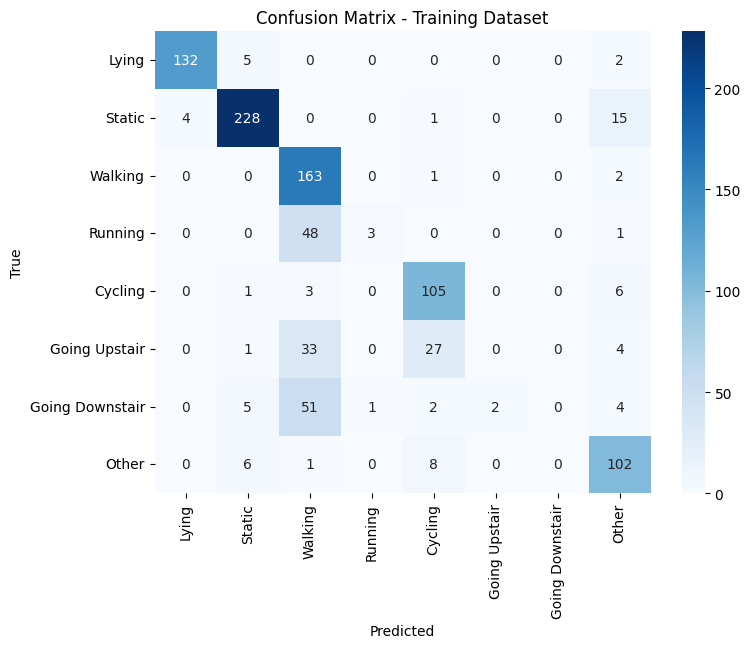

<Figure size 640x480 with 0 Axes>

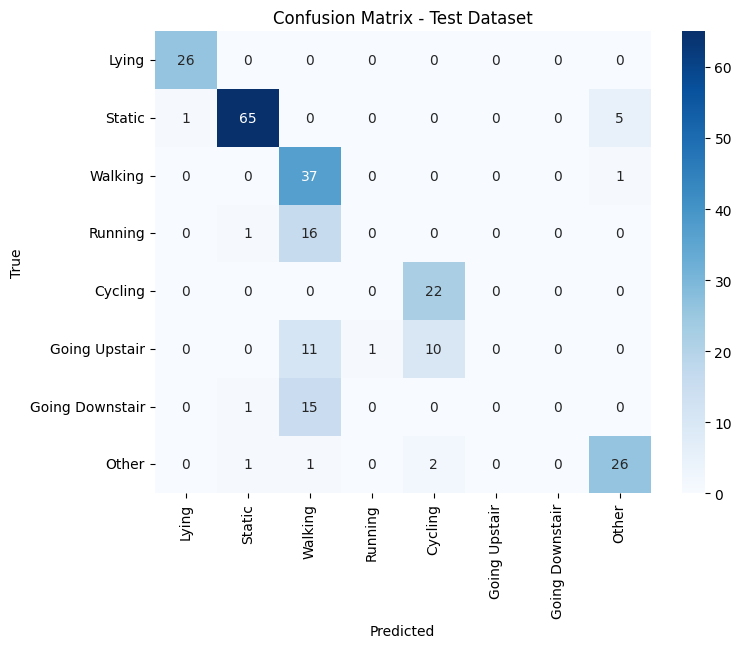

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot confusion matrix for training dataset
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Training Dataset')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.savefig("TrainingData.png")

# Plot confusion matrix for test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Test Dataset')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.savefig("TestData.png")

In [ ]:
df6= pd.read_excel("subject106.xlsx")

In [ ]:
# working with df6 dataset for testing model
#preprocessing the dataset as done above
df6 = df6[df6['Activity_id'] != 0]
df6 = df6.dropna()
df6.drop('Temp', axis=1, inplace=True)
activity_id_mapping = {7:0, 17:0, 24:0, 1:1, 2:2, 3:2, 4:3, 5:4, 6:5, 12:6, 13:7, 16:8}
df6['Activity_id'] = df6['Activity_id'].map(activity_id_mapping)
df6 = df6[df6['Activity_id'] != 0]

In [ ]:
activity_id_mapping = {1:0 , 2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7}
df6['Activity_id'] = df6['Activity_id'].map(activity_id_mapping)

df6 = df6.sort_values(by='Activity_id')


In [ ]:
# without overlapping
num_rows_1 = df6.shape[0]
num_segments_1 = num_rows_1 // N_TIME_STEPS

segments_1 = []
labels_1 = []

In [ ]:
for i in range(num_segments_1):
    start_idx_1 = i * N_TIME_STEPS
    end_idx_1 = start_idx_1 + N_TIME_STEPS

    segment_data_1 = df6.iloc[start_idx_1:end_idx_1]  # Extract the segment
    activity_ids_1 = segment_data_1['Activity_id'].unique()     # Get unique activity_id values in the segment

    if len(activity_ids_1) == 1:
        # If the segment contains only one activity_id, keep it
        segment_values_1 = segment_data_1[['acc-x', 'acc-y', 'acc-z', 'gyro-x', 'gyro-y', 'gyro-z']].values
        segment_label_1 = activity_ids_1[0]
        segments_1.append(segment_values_1)
        labels_1.append(segment_label_1)

segments_1 = np.array(segments_1)
labels_1 = np.array(labels_1)

In [ ]:
predictions_person = model.predict(segments_1)
predictions_person = np.argmax(predictions_person, axis=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(labels_1, predictions_person)
precision = precision_score(labels_1, predictions_person, average='weighted')
recall = recall_score(labels_1, predictions_person, average='weighted')
f1 = f1_score(labels_1, predictions_person, average='weighted')
conf_matrix = confusion_matrix(labels_1, predictions_person,)

In [ ]:

# Print the evaluation results
print("Evaluation Results for Person 6 (Validation Set):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Evaluation Results for Person 6 (Validation Set):
Accuracy: 0.76
Precision: 0.78
Recall: 0.76
F1 Score: 0.74
Confusion Matrix:
[[44  0  0  0  1  0  0  1]
 [ 0 91  0  0  0  0  0  2]
 [ 0  2 47  0  1  0  0  0]
 [ 0  4 10 25  0  0  6  0]
 [ 0  1  0  0 39  0  0  0]
 [ 0  1  3  0  9  9  0  3]
 [ 0  4 11  3  0  0  3  1]
 [ 0  0  0  0 21  2  0 18]]


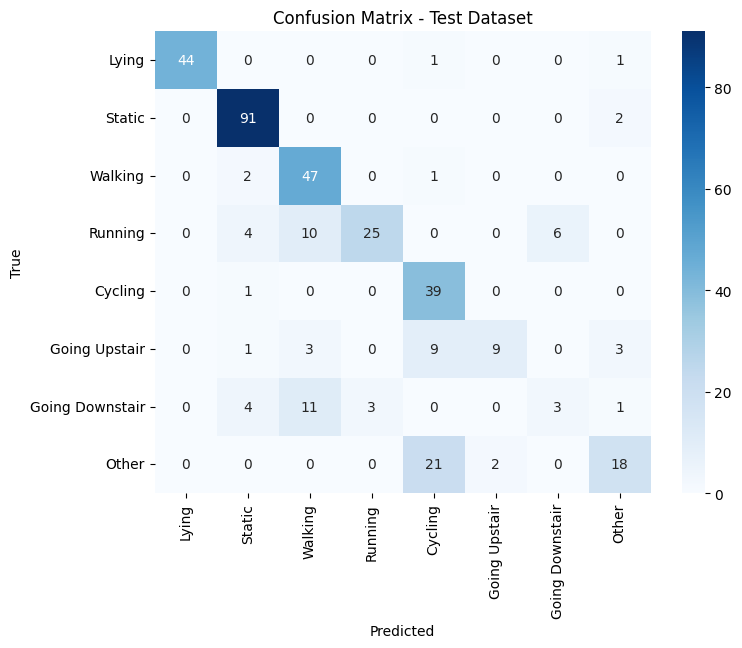

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Test Dataset')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
pip install --upgrade tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
